In [2]:
# 导入需要的库文件
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征矩阵
y = iris.target  # 标签向量
feature_names = iris.feature_names  # 特征
target_names = iris.target_names  # 类别

In [3]:
# 数据信息
print("数据集形状:", X.shape)
print("特征名称:", feature_names)
print("类别名称:", target_names)
print("\n前5条数据:")
print(X[:5])
print("\n前5个标签:")
print(y[:5])

数据集形状: (150, 4)
特征名称: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
类别名称: ['setosa' 'versicolor' 'virginica']

前5条数据:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

前5个标签:
[0 0 0 0 0]


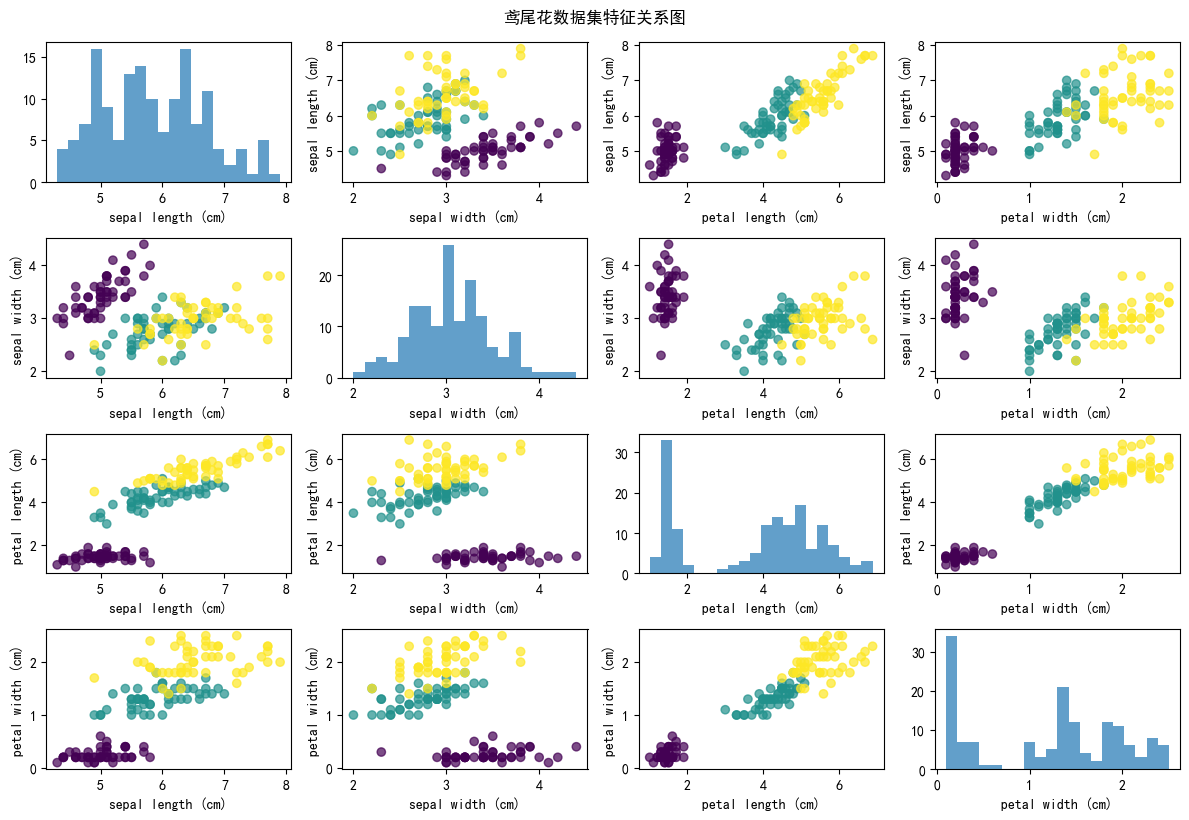

In [6]:
# 可视化特征之间关系
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 8))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i*4 + j + 1)
        if i == j:
            plt.hist(X[:, i], bins=20, alpha=0.7)
            plt.xlabel(feature_names[i])
        else:
            plt.scatter(X[:, j], X[:, i], c=y, cmap='viridis', alpha=0.7)
            plt.xlabel(feature_names[j])
            plt.ylabel(feature_names[i])
        if j == 0 and i != 0:
            plt.ylabel(feature_names[i])
plt.tight_layout()
plt.suptitle('鸢尾花数据集特征关系图', y=1.02)
plt.show()

In [9]:
# 划分训练集和测试集 (按7:3比例)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\n训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")


训练集大小: 105
测试集大小: 45


In [10]:
model = LogisticRegression(max_iter=200, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [16]:
# 步骤五：使用测试集进行预测
y_pred = model.predict(X_test)
print("\n预测结果:", y_pred)
print("实际标签:", y_test)

# 计算精确度
accuracy = np.mean(y_pred == y_test)
print(f"\n模型精确度: {accuracy:.4f}")

# 保存预测结果
np.savetxt('predictions_SiyuGuo_20222601017.txt', y_pred, fmt='%d')


预测结果: [2 1 1 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]
实际标签: [2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]

模型精确度: 0.9333


In [17]:
# 评估
print("\n混淆矩阵:")
hxjz = confusion_matrix(y_test, y_pred)
print(hxjz)

print("\n分类报告:")
print(classification_report(y_test, y_pred, target_names=target_names))


混淆矩阵:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]

分类报告:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



<Figure size 1000x800 with 0 Axes>

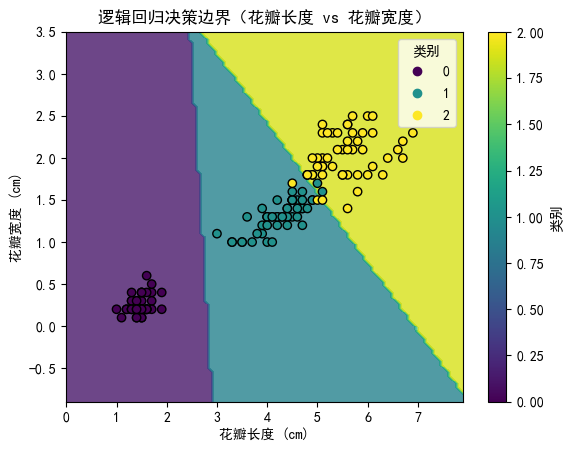

In [18]:
# 选择花瓣长度和花瓣宽度这两个特征
selected_features = [2, 3]  # 索引长度和宽度
X_selected = X[:, selected_features]

# 用选定的特征重划数据集
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)
# 训练新模型
model_2d = LogisticRegression(max_iter=200, random_state=42)
model_2d.fit(X_train_sel, y_train_sel)

plt.figure(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(model_2d,X_selected,cmap='viridis',alpha=0.8,response_method="predict",)
scatter = plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('花瓣长度 (cm)')
plt.ylabel('花瓣宽度 (cm)')
plt.title('逻辑回归决策边界（花瓣长度 vs 花瓣宽度）')
plt.legend(*scatter.legend_elements(), title='类别')
plt.colorbar(scatter, label='类别')
plt.show()